<a href="https://colab.research.google.com/github/ervhart/ervhart.github.io/blob/main/movieproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Muhydeen Olakunle Adelani
Data Source: https://www.kaggle.com/danielgrijalvas/movies
Project Purpose: Finding correlation in Python with Movie Industry Data.
Tools Used: Python, Python Libraries

**Importing Necessary Libraries**

In [100]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import csv

#%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

#pd.options.mode.chained_assignment = None

**Loading Dataset** 

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
data = pd.read_csv('/content/drive/MyDrive/data/movies.csv')

In [66]:
data.head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Take This Job and Shove It,PG,Comedy,1981,"May 15, 1981 (United States)",5,761,Gus Trikonis,Barry Schneider,Robert Hays,United States,3500000,17569027,Cinema Group Ventures,100.0
189,Whose Life Is It Anyway?,R,Comedy,1981,"January 22, 1982 (United States)",7,2700,John Badham,Brian Clark,Richard Dreyfuss,United States,13000000,8206145,Metro-Goldwyn-Mayer (MGM),119.0
190,Inchon,PG,Drama,1981,"September 17, 1982 (United States)",2,659,Terence Young,Robin Moore,Laurence Olivier,South Korea,46000000,5200986,One Way Productions,140.0
191,All Night Long,R,Comedy,1981,"March 6, 1981 (United States)",5,1700,Jean-Claude Tramont,W.D. Richter,Gene Hackman,United States,14000000,4454295,Universal Pictures,87.0


**Data Exploration and Cleaning**

Checking for Not Available Number(NAN) in the datasets 

In [58]:
data.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Dropping the NAN datasets from the table

In [59]:
data.dropna(axis=0,inplace=True)

Checking again that the NAN datasets dropped

In [60]:
data.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

The data is clean now.

Checking if there is missing value again to ascertain the data is clean using percentage approach

In [61]:
for colum in data.columns:
    percent_missing = np.mean(data[colum].isnull())
    print('{} - {}%'.format(colum, round(percent_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


**Checking the column data types**

In [62]:
print(data.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


**Changing the data type columns for score, votes, budget and gross from float to integer**

In [64]:
data['score']=data['score'].astype('int64')
data['votes']=data['votes'].astype('int64')
data['budget'] = data['budget'].astype('int64')
data['gross'] = data['gross'].astype('int64')

Checking that the conversion is done

In [65]:
print(data.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score         int64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object


Group the data by gross

In [69]:
data.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


**Checking for correlation using budget, company and gross columns by making use of scatter plot, seaborn**

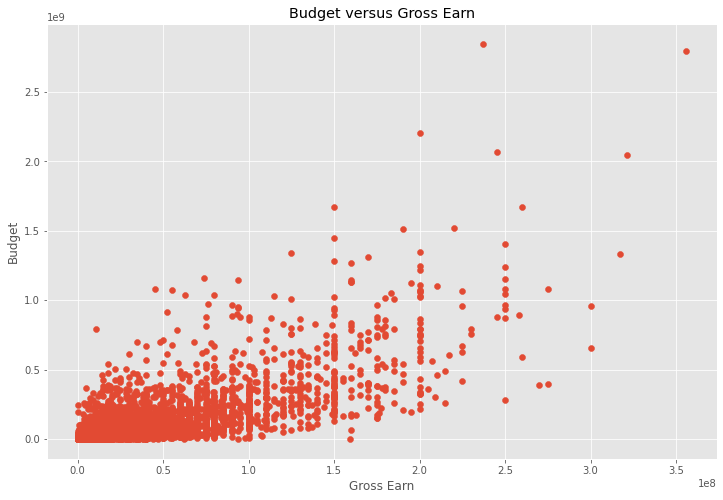

In [91]:
#Scatter plot of budget with gross
plt.scatter(x=data['budget'],y=data['gross'])
plt.title('Budget versus Gross Earn')
plt.xlabel('Gross Earn')
plt.ylabel('Budget')
plt.show()

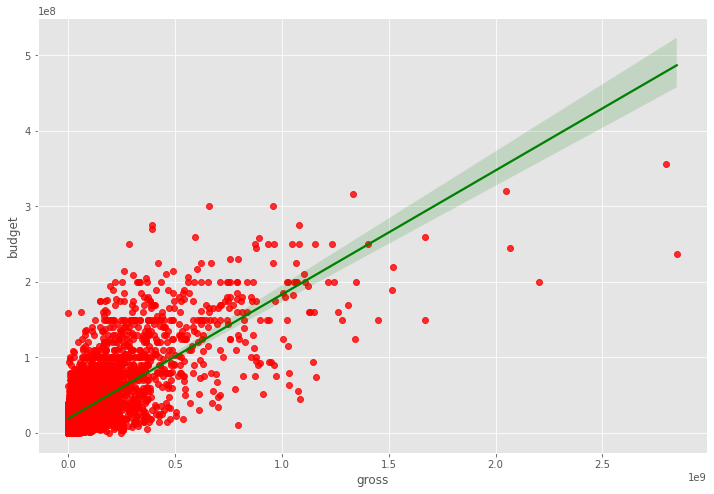

In [94]:
sns.regplot(x="gross", y="budget", data=data, scatter_kws={"color":"red"}, line_kws={"color":"green"})

**Checking for correlation in the table. Note: It will only work for numeric columns in the table**

In [95]:
data.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.057013,0.206021,0.327722,0.274321,0.075077
score,0.057013,1.000000,0.455808,0.066443,0.211973,0.394589
votes,0.206021,0.455808,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.066443,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.211973,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.394589,0.352303,0.318695,0.275796,1.000000


**Correlation Matrix between all numeric columns**

In [81]:
data.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057013,0.206021,0.327722,0.274321,0.075077
score,0.057013,1.000000,0.455808,0.066443,0.211973,0.394589
votes,0.206021,0.455808,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.066443,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.211973,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.394589,0.352303,0.318695,0.275796,1.000000


In [82]:
data.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.044956,0.296512,0.220833,0.239539,0.064824
score,0.044956,1.000000,0.369110,-0.006778,0.135035,0.307368
votes,0.296512,0.369110,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006778,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.135035,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.307368,0.205344,0.231278,0.176979,1.000000


In [83]:
data.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.059407,0.427623,0.312886,0.351045,0.095444
score,0.059407,1.000000,0.474519,-0.009156,0.178342,0.393549
votes,0.427623,0.474519,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009156,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.178342,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.393549,0.300621,0.330794,0.257400,1.000000


**Data Visualization of the Correlation Matrix**

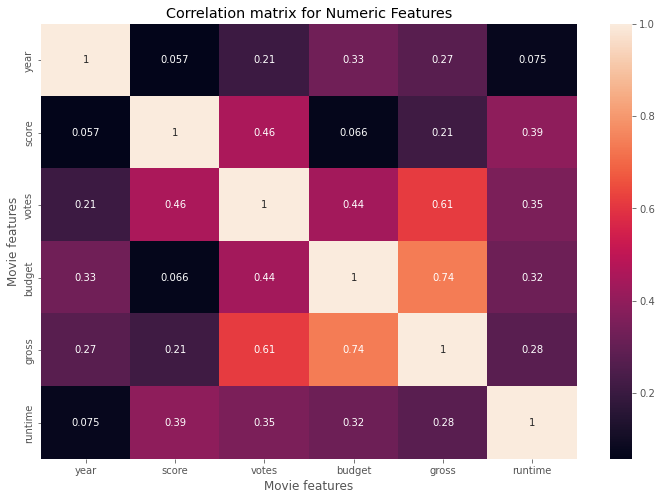

In [96]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()